In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw8/hw8_nolabel_train.dat", header=None, delim_whitespace = True)
data_x = data.as_matrix()

In [3]:
from scipy.spatial import distance_matrix

In [4]:
class KMeanCluster():
    def __init__(self, k=3):
        self.k = k
        self.u = None
        self.dm = None
        self.group = None
    def fit(self, x):
        self.group = np.zeros(x.shape[0])
        self.u = x[np.random.choice(range(x.shape[0]), self.k)]
        while True:
            self.dm = distance_matrix(x, self.u)
            new_group = np.array([d.argmin() for d in self.dm])
            if (new_group == self.group).all():
                break
            self.group = new_group
            self.u = np.array([x[self.group==i].mean(axis = 0) for i in range(self.k)])
            self.u = np.nan_to_num(self.u)
            
    @property    
    def e_in(self):
        distance = np.array([self.dm[i][self.group[i]] for i in range(self.dm.shape[0])])
        return np.mean(distance**2)

In [5]:
k_parameter = (2,4,6,8,10)
result = pd.DataFrame()
for k in k_parameter:
    e = []
    clf = KMeanCluster(k=k)
    for i in range(500):
        clf.fit(data_x)
        e.append(clf.e_in)
    result[k] = pd.Series(e)
    

C:\Users\Gilbert\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Gilbert\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


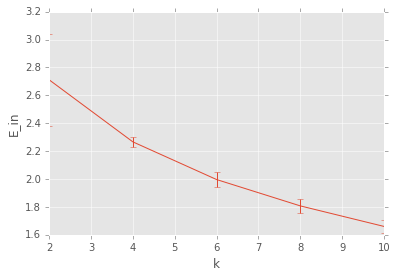

In [6]:
result.mean().plot(yerr = result.std())
plt.xlabel("k")
plt.ylabel("E_in")
plt.savefig("p20")